# Chapter 17 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbin

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

# ANOVA of fat absorption data

 Load required packages

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

 Prepare dataset

In [3]:
fat_absorption = pd.DataFrame([
    [1, 164, 178, 175, 155],
    [2, 172, 191, 193, 166],
    [3, 168,  197,  178,  149],
    [4,  177,  182,  171,  164],
    [5,  156,  185,  163,  170],
    [6,  195,  177,  176, 168],
], columns=["Replication", "Fat 1", "Fat 2", "Fat 3", "Fat 4"])

## Exploratory data analysis

 Dotplot

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


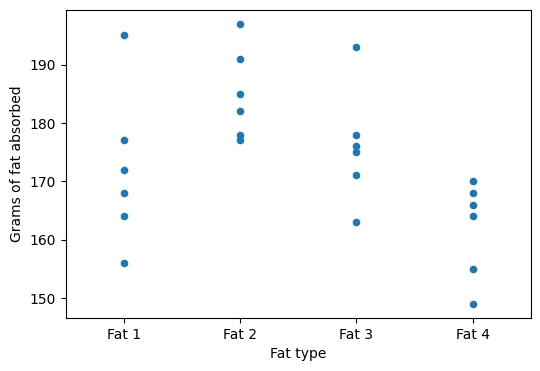

In [4]:
fats = ["Fat 1", "Fat 2", "Fat 3", "Fat 4"]

# convert from wide to long format for plotting
fat_long = fat_absorption.melt(value_vars=fats)

fig, ax = plt.subplots(figsize=(6, 4))
fat_long.plot.scatter(x="variable", y="value", ax=ax)
ax.set_xlabel("Fat type")
ax.set_ylabel("Grams of fat absorbed")
ax.set_xlim(-0.5, 3.5)
plt.show()

 Boxplots

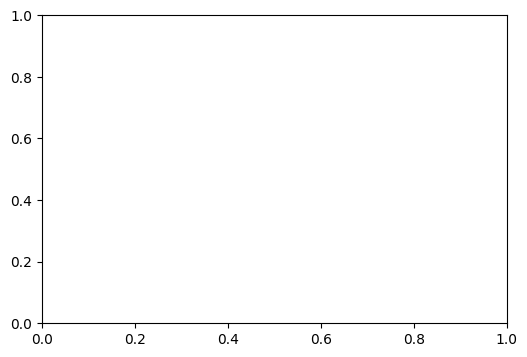

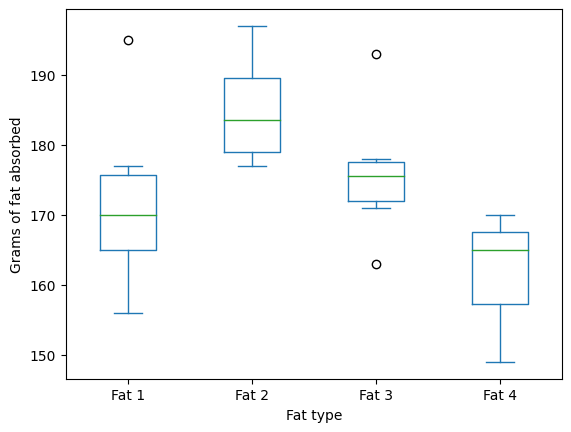

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = fat_absorption[fats].plot.box()
ax.set_xlabel("Fat type")
ax.set_ylabel("Grams of fat absorbed")
ax.set_xlim(0.5, 4.5)
plt.show()

## Components of variance

 Calculate averages for each fat and grand average

In [6]:
fat_average = fat_absorption[fats].mean(axis=0)
grand_average = fat_absorption[fats].to_numpy().mean()

print("Average for fats")
print(fat_average)
print(f"Grand average: {grand_average}")

Average for fats
Fat 1    172.0
Fat 2    185.0
Fat 3    176.0
Fat 4    162.0
dtype: float64
Grand average: 173.75


## Constructing the Factor Diagram

In [7]:
factor_observations = fat_absorption[fats]
factor_grand_average = factor_observations.copy()
factor_grand_average[:] = grand_average
factor_treatment_effects = factor_observations.copy()
factor_treatment_effects[:] = fat_average - grand_average

factor_residual_error = factor_observations - factor_grand_average - factor_treatment_effects
factor_observations, factor_grand_average, factor_treatment_effects, factor_residual_error

(   Fat 1  Fat 2  Fat 3  Fat 4
 0    164    178    175    155
 1    172    191    193    166
 2    168    197    178    149
 3    177    182    171    164
 4    156    185    163    170
 5    195    177    176    168,
     Fat 1   Fat 2   Fat 3   Fat 4
 0  173.75  173.75  173.75  173.75
 1  173.75  173.75  173.75  173.75
 2  173.75  173.75  173.75  173.75
 3  173.75  173.75  173.75  173.75
 4  173.75  173.75  173.75  173.75
 5  173.75  173.75  173.75  173.75,
    Fat 1  Fat 2  Fat 3  Fat 4
 0  -1.75  11.25   2.25 -11.75
 1  -1.75  11.25   2.25 -11.75
 2  -1.75  11.25   2.25 -11.75
 3  -1.75  11.25   2.25 -11.75
 4  -1.75  11.25   2.25 -11.75
 5  -1.75  11.25   2.25 -11.75,
    Fat 1  Fat 2  Fat 3  Fat 4
 0   -8.0   -7.0   -1.0   -7.0
 1    0.0    6.0   17.0    4.0
 2   -4.0   12.0    2.0  -13.0
 3    5.0   -3.0   -5.0    2.0
 4  -16.0    0.0  -13.0    8.0
 5   23.0   -8.0    0.0    6.0)

In [8]:
deviation = fat_average - grand_average
print(deviation)
deviation_squared = deviation ** 2
print(deviation_squared)
total_deviation = deviation_squared.sum()
print(total_deviation)
variance = total_deviation / (len(fats) - 1)
print(variance)

Fat 1    -1.75
Fat 2    11.25
Fat 3     2.25
Fat 4   -11.75
dtype: float64
Fat 1      3.0625
Fat 2    126.5625
Fat 3      5.0625
Fat 4    138.0625
dtype: float64
272.75
90.91666666666667


## Resampling procedure to compare means

In [9]:
random.seed(123)

# step 1
data = fat_absorption[fats].to_numpy()
box = list(data.flatten())

shuffled_vars = []
for _ in range(10000):
    # step 2
    # shuffle the box and convert to same format as original
    # dataset
    shuffled = random.sample(box, k=len(box))
    shuffled_data = np.reshape(shuffled, data.shape)

    # step 3
    # determine means of shuffled data
    shuffled_means = shuffled_data.mean(axis=0)

    # step 4
    # calculate variance of means
    shuffled_var = np.var(shuffled_means)
    shuffled_vars.append(shuffled_var)
shuffled_above_threshold = sum(shuffled_vars > variance)
resampled_p_value = shuffled_above_threshold / len(shuffled_vars)

for resampled_var in sorted(shuffled_vars, reverse=True)[:10]:
    print(f"{resampled_var:.3f}")
print()
print(f"Resampled p-value: {resampled_p_value:.4f}")

110.229
97.132
96.451
94.785
93.188
91.868
91.035
89.743
89.563
88.507

Resampled p-value: 0.0007


 Visualize the resmapled variances in a histogram

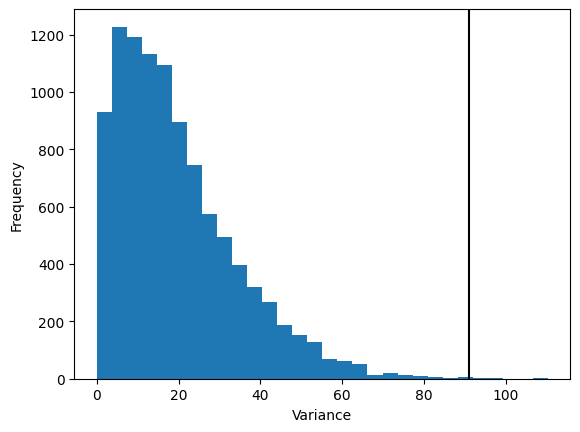

In [10]:
ax = pd.Series(shuffled_vars).plot.hist(bins=30)
ax.set_xlabel("Variance")
ax.axvline(variance, color="black")
plt.show()

In [11]:
ssq_grand_average = (factor_grand_average**2).sum().sum()
ssq_treatment_effects = (factor_treatment_effects**2).sum().sum()
ssq_residual_error = (factor_residual_error**2).sum().sum()
print(ssq_grand_average)
print(ssq_treatment_effects)
print(ssq_residual_error)

724537.5
1636.5
2018.0


In [12]:
df_treatment = len(fats) - 1
df_residual = len(fats) * (len(fat_absorption) - 1)
var_treatment_effects = ssq_treatment_effects / df_treatment
var_residual_error = ssq_residual_error / df_residual
F_statistic = var_treatment_effects / var_residual_error
p_value = 1 - stats.f.cdf(F_statistic, df_treatment, df_residual)

print(f"Variance treatment {var_treatment_effects}")
print(f"Variance residual {var_residual_error}")
print(f"F-statistic {F_statistic:.6f}")
print(f"p-value {p_value:.4f}")

Variance treatment 545.5
Variance residual 100.9
F-statistic 5.406343
p-value 0.0069


## ANOVA using statsmodels

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
ols_model = ols("value ~ C(variable)", data=fat_long).fit()
sm.stats.anova_lm(ols_model)

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),3.0,1636.5,545.5,5.406343,0.006876
Residual,20.0,2018.0,100.9,NaN,NaN


## ANOVA using statsmodels

In [14]:
stats.f_oneway(fat_absorption["Fat 1"], fat_absorption["Fat 2"], fat_absorption["Fat 3"], fat_absorption["Fat 4"])
stats.f_oneway(*[fat_absorption[fat] for fat in fats])

F_onewayResult(statistic=5.406342913776015, pvalue=0.0068759477547351)

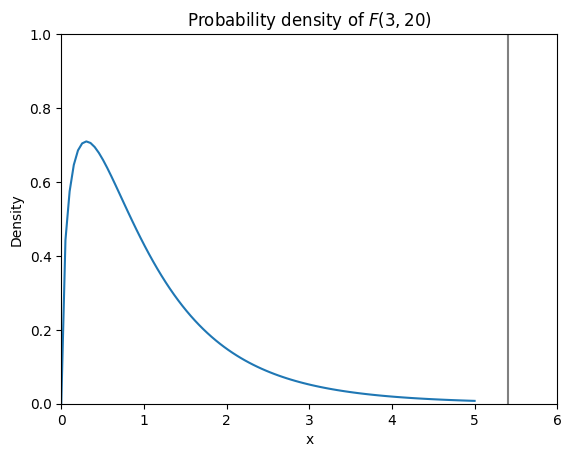

In [15]:
x = np.linspace(0, 5, 100)
df = pd.DataFrame({
    "x": x,
    "f-pdf": stats.f.pdf(x, 3, 20),
    "1-cdf": 1 - stats.f.cdf(x, 3, 20),
})
ax = df.plot(x="x", y="f-pdf", legend=False)
ax.axvline(x=F_statistic, color="grey")
ax.set_ylabel("Density")
ax.set_ylim(0, 1)
ax.set_xlim(0, 6)
ax.set_title("Probability density of $F(3, 20)$")

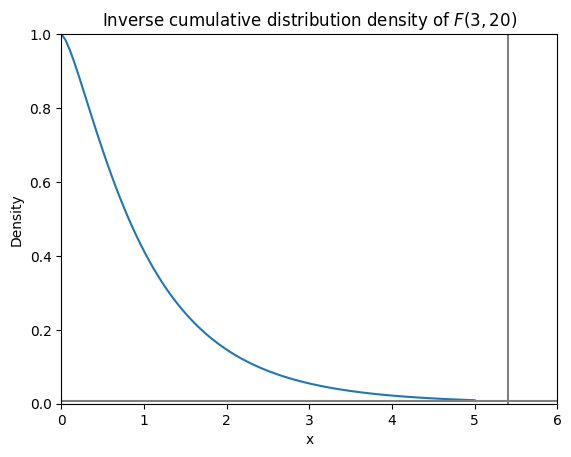

In [16]:
ax = df.plot(x="x", y="1-cdf", legend=False)
ax.axvline(x=F_statistic, color="grey")
ax.axhline(y=p_value, color="grey")
ax.set_ylabel("Density")
ax.set_ylim(0, 1)
ax.set_xlim(0, 6)
ax.set_title("Inverse cumulative distribution density of $F(3, 20)$")

# Two-way ANOVA

 Load the joint strength data

In [17]:
data = pd.read_csv("jointstrength.csv")
factors = ["Antimony", "Cooling Method"]
outcome = "Joint Strength"
data.head()

,Antimony,Cooling Method,Joint Strength
0,0,1,17.6
1,0,1,19.5
2,0,1,18.3
3,0,2,20.0
4,0,2,24.3


 Visualize as boxplot

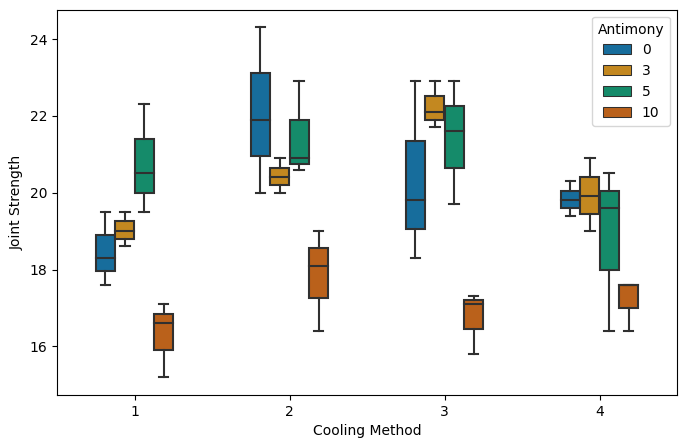

In [18]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x="Cooling Method", y="Joint Strength", hue="Antimony", data=data,
            width=0.5, palette="colorblind", ax=ax)
plt.show()

 Decomposition of the antimony data into a factor diagram

 First calculate the means of the factors and their interaction

In [19]:
mean_treatment1 = data.groupby("Antimony")["Joint Strength"].mean()
mean_treatment2 = data.groupby("Cooling Method")["Joint Strength"].mean()
mean_interaction = data.groupby(factors).mean()

 Determine components of the factor diagram

In [20]:
factor_observations = np.array(data[outcome]).reshape(12, 4, order="F")
factor_grand_average = np.full((12, 4), grand_average)
# Make sure that the order of the treatment components matches the order of the observations
factor_treatment1 = mean_treatment1.to_numpy() - factor_grand_average
factor_treatment2 = np.repeat(mean_treatment2.to_numpy(), 12).reshape(12, 4) - factor_grand_average

 Determine the interaction component and finally the residual error

In [21]:
partial_fit = factor_grand_average + factor_treatment1 + factor_treatment2
factor_interaction = (np.repeat(data.groupby(factors).mean().to_numpy(), 3).reshape(12, 4, order="F") -
                      partial_fit)
factor_residual_error = factor_observations - partial_fit - factor_interaction

## Two-way ANOVA using statsmodels

 The following code is used to conduct a two-way ANOVA using the \mbox

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'Q("Joint Strength") ~ C(Antimony) * C(Q("Cooling Method"))'
ols_model = ols(formula, data=data).fit()
sm.stats.anova_lm(ols_model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Antimony),3.0,104.194167,34.731389,20.117131,1.636964e-07
"C(Q(""Cooling Method""))",3.0,28.627500,9.542500,5.527211,3.571000e-03
"C(Antimony):C(Q(""Cooling Method""))",9.0,25.130833,2.792315,1.617366,1.522587e-01
Residual,32.0,55.246667,1.726458,NaN,NaN


## Relationship of antimony to joint strength

 Scatterplot of the data

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


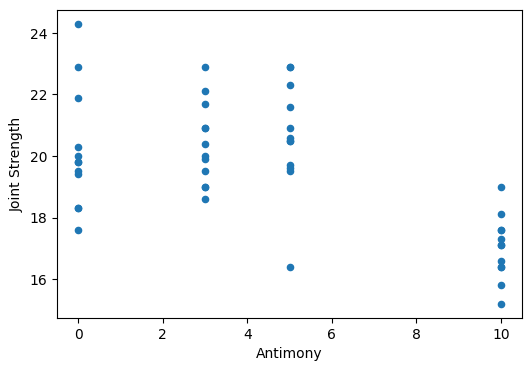

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
data.plot.scatter(x="Antimony", y="Joint Strength", ax=ax)
ax.set_xlabel("Antimony")
ax.set_ylabel("Joint Strength")
# ax.set_xlim(-0.5, 3.5)
plt.show()

 Boxplot of the data

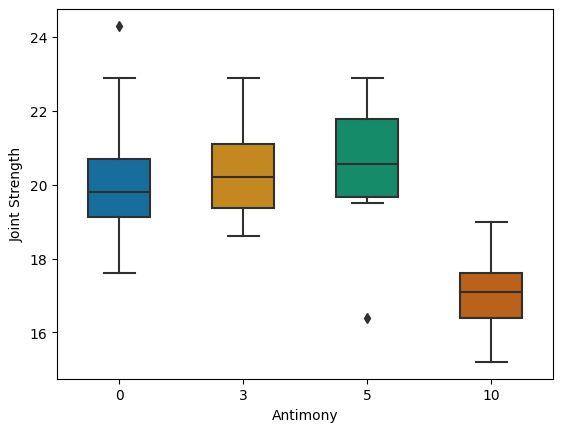

In [24]:
ax = sns.boxplot(x="Antimony", y="Joint Strength", data=data, width=0.5, palette="colorblind")
plt.show()

## Regression of joint strength on antimony

 Reduce dataset to rows with antimony values less than 10

In [25]:
data_reduced = data[data["Antimony"] < 10]

 Fit regression model on reduced dataset

In [26]:
formula = 'Q("Joint Strength") ~ Antimony'
ols_model = ols(formula, data=data_reduced).fit()
ols_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS                 Adj. R-squared:     -0.017  
Dependent Variable: Q("Joint Strength") AIC:                142.0006
Date:               2023-07-10 13:15    BIC:                145.1677
No. Observations:   36                  Log-Likelihood:     -69.000 
Df Model:           1                   F-statistic:        0.4062  
Df Residuals:       34                  Prob (F-statistic): 0.528   
R-squared:          0.012               Scale:              2.8652  
----------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
Intercept    20.1667     0.4622   43.6316   0.0000   19.2274   21.1060
Antimony      0.0875     0.1373    0.6373   0.5282   -0.1915    0.3665
--------------------------------------------------------------------
Omnibus:               1.022         Durbin-Watson:            1.725
Prob(Omnibus):         0.600         Jarque-Bera (JB):         0.320
Skew:                  0.170         Prob(JB):                 0.852
Kurtosis:              3.314         Condition No.:            6    
====================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
"""